# Uber data analysis for the month of June

In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pandas.read_csv('Desktop/uber-raw-data-jun14.csv')

In [3]:
data.tail()

,Date/Time,Lat,Lon,Base
663839,6/30/2014 22:40:00,40.7332,-73.9872,B02764
663840,6/30/2014 23:12:00,40.7905,-73.9796,B02764
663841,6/30/2014 23:13:00,40.7640,-73.9887,B02764
663842,6/30/2014 23:15:00,40.7262,-73.9944,B02764
663843,6/30/2014 23:35:00,40.7404,-73.9848,B02764


In [4]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [5]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512


In [6]:
def get_date(dt):
    return dt.day
data['date'] = data['Date/Time'].map(get_date)

In [7]:
def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

In [9]:
def get_hour(dt):
    return dt.hour
data['hours'] = data['Date/Time'].map(get_hour)

In [11]:
data.tail()

,Date/Time,Lat,Lon,Base,date,weekday,hours
663839,2014-06-30 22:40:00,40.7332,-73.9872,B02764,30,0,22
663840,2014-06-30 23:12:00,40.7905,-73.9796,B02764,30,0,23
663841,2014-06-30 23:13:00,40.7640,-73.9887,B02764,30,0,23
663842,2014-06-30 23:15:00,40.7262,-73.9944,B02764,30,0,23
663843,2014-06-30 23:35:00,40.7404,-73.9848,B02764,30,0,23


Text(0.5, 1.0, 'Frequency by Date - uber - Jun 2014')

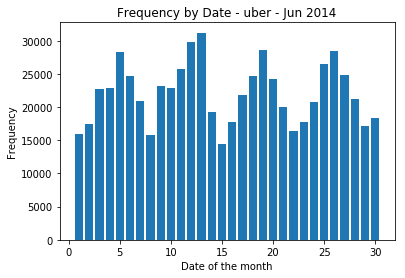

In [12]:
hist(data.date, bins=30, rwidth=0.8, range=(0.5,30.5))
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by Date - uber - Jun 2014')

In [15]:
def count_rows(rows):
    return len(rows)
num = data.groupby('date').apply(count_rows)
num

date
1     15967
2     17503
3     22674
4     22831
5     28371
6     24683
7     20889
8     15749
9     23244
10    22874
11    25716
12    29844
13    31207
14    19327
15    14511
16    17778
17    21807
18    24647
19    28594
20    24271
21    19940
22    16322
23    17735
24    20779
25    26460
26    28516
27    24895
28    21208
29    17107
30    18395
dtype: int64

In [16]:
s = num.sort_values()
s

date
15    14511
8     15749
1     15967
22    16322
29    17107
2     17503
23    17735
16    17778
30    18395
14    19327
21    19940
24    20779
7     20889
28    21208
17    21807
3     22674
4     22831
10    22874
9     23244
20    24271
18    24647
6     24683
27    24895
11    25716
25    26460
5     28371
26    28516
19    28594
12    29844
13    31207
dtype: int64

Text(0.5, 1.0, 'Frequency by DoM - uber - Jun 2014')

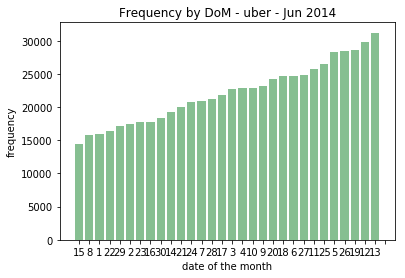

In [18]:
bar(range(0,30), s,color='#86bf91')
xticks(range(0,31), s.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Jun 2014')

(array([14514.,  9167.,  6189.,  6937.,  7701., 11955., 22030., 30834.,
        29771., 24298., 23584., 24155., 25233., 28937., 34428., 41586.,
        48162., 50452., 45013., 38203., 40108., 40791., 35614., 24182.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 24 Patch objects>)

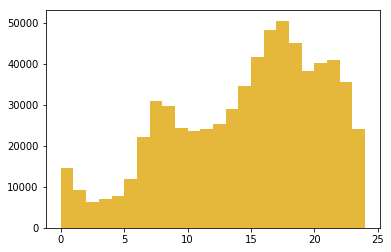

In [19]:
hist(data.hours, bins=24, range=(0, 24),color='#e5b73b')

([<matplotlib.axis.XTick at 0x1cba7387b00>,
 <a list of 7 Text xticklabel objects>)

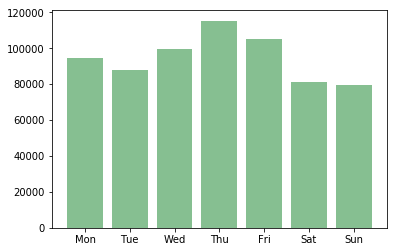

In [20]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#86bf91')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

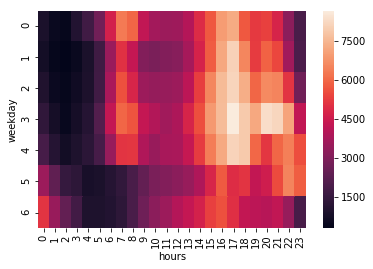

In [21]:
cross = data.groupby('weekday hours'.split()).apply(count_rows).unstack()
seaborn.heatmap(cross)